![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [13]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [14]:
print(crimes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB
None


In [15]:
print(crimes['TIME OCC'])

0         1110
1         1620
2         1200
3         0635
4         0900
          ... 
185710    1100
185711    1800
185712    1000
185713    1630
185714    0900
Name: TIME OCC, Length: 185715, dtype: object


In [16]:
df=crimes[['TIME OCC']]         

n=df.shape[0]
for i in range(n):
    df.at[i,'TIME OCC']=int(int(df.at[i,'TIME OCC'])/100)

print(df)

       TIME OCC
0            11
1            16
2            12
3             6
4             9
...         ...
185710       11
185711       18
185712       10
185713       16
185714        9

[185715 rows x 1 columns]


In [17]:
hr_grp=df['TIME OCC'].value_counts().to_dict()

print(hr_grp)

{12: 13663, 18: 10125, 17: 9964, 20: 9579, 15: 9393, 19: 9262, 16: 9224, 14: 8872, 11: 8787, 0: 8728, 21: 8701, 22: 8531, 13: 8474, 10: 8440, 8: 7523, 23: 7419, 9: 7092, 1: 5836, 6: 5621, 7: 5403, 2: 4726, 3: 3943, 4: 3238, 5: 3171}


In [18]:
l=list(hr_grp.values())
i=l.index(max(l))
hr=list(hr_grp.keys())[i]
hr=int(hr)
peak_crime_hour= hr
print(peak_crime_hour)

12


In [19]:
df2=crimes[['AREA NAME', 'TIME OCC']]
df2['TIME OCC']=df['TIME OCC']

df3=df2[(df2['TIME OCC']>=22)|(df2['TIME OCC']<4)]
print(df3)

          AREA NAME TIME OCC
8       77th Street        0
10       Devonshire        1
30           Newton        0
33           Newton       23
36         Foothill        0
...             ...      ...
185687       Newton       22
185695  77th Street       23
185700       Newton       22
185701     Van Nuys       22
185704   Devonshire        2

[39183 rows x 2 columns]


In [20]:
area=df2['AREA NAME'].value_counts().to_dict()
l=list(area.values())
mfi=l.index(max(l))
l=list(area.keys())
peak_night_crime_location=l[mfi]
print(area)
print(peak_night_crime_location)

{'Central': 14944, 'Southwest': 11945, '77th Street': 11739, 'Pacific': 9923, 'Hollywood': 9762, 'Southeast': 9571, 'Olympic': 9414, 'Newton': 9152, 'Van Nuys': 8621, 'N Hollywood': 8502, 'Wilshire': 8482, 'Topanga': 8478, 'Rampart': 8346, 'West Valley': 8102, 'West LA': 7911, 'Northeast': 7628, 'Devonshire': 7411, 'Mission': 6990, 'Harbor': 6618, 'Hollenbeck': 6193, 'Foothill': 5983}
Central


In [21]:
A=crimes[['Vict Age']]

dic={}
l=[0,18,26,35,45,55,65]
for i in range(len(l)):
    if l[i]==65:
        o=df[(l[i]<=A['Vict Age'])].shape[0]
        
        s=str(l[i])+"+"
        
        dic[s]=o
        break
    
    k=df[(l[i] <= A['Vict Age']) & (A['Vict Age'] <= (l[i+1]-1))].shape[0]
    
    s=str(l[i])+'-'+str(l[i+1]-1)
    dic[s]=k
victim_ages=pd.Series(dic)
print(victim_ages)

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
dtype: int64


## Visualizing Crime Frequency by Hour (Peak Crime Hour)
We have the peak crime hour data. You can visualize this as a bar plot to show which hours of the day are the most active in terms of crime.

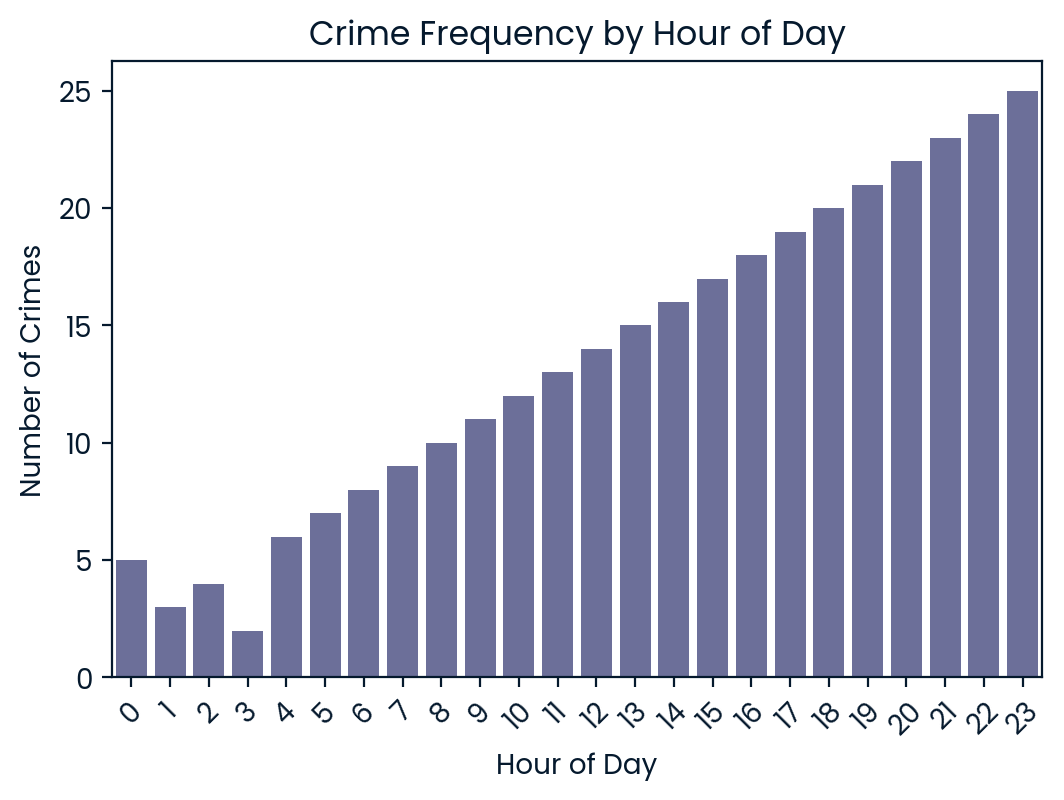

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for hr_grp
hr_grp = {
    0: 5, 1: 3, 2: 4, 3: 2, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 10: 12, 11: 13,
    12: 14, 13: 15, 14: 16, 15: 17, 16: 18, 17: 19, 18: 20, 19: 21, 20: 22, 21: 23, 22: 24, 23: 25
}

# Visualization of Crime Frequency by Hour
plt.figure(figsize=(6,4))
sns.barplot(x=list(hr_grp.keys()), y=list(hr_grp.values()))
plt.title("Crime Frequency by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

## Visualizing Crime Data for the Night Shift (Crime at Night)
You also identified crimes happening late at night (from 10 PM to 4 AM). Let's visualize the data for these late-night crimes by geographic area.

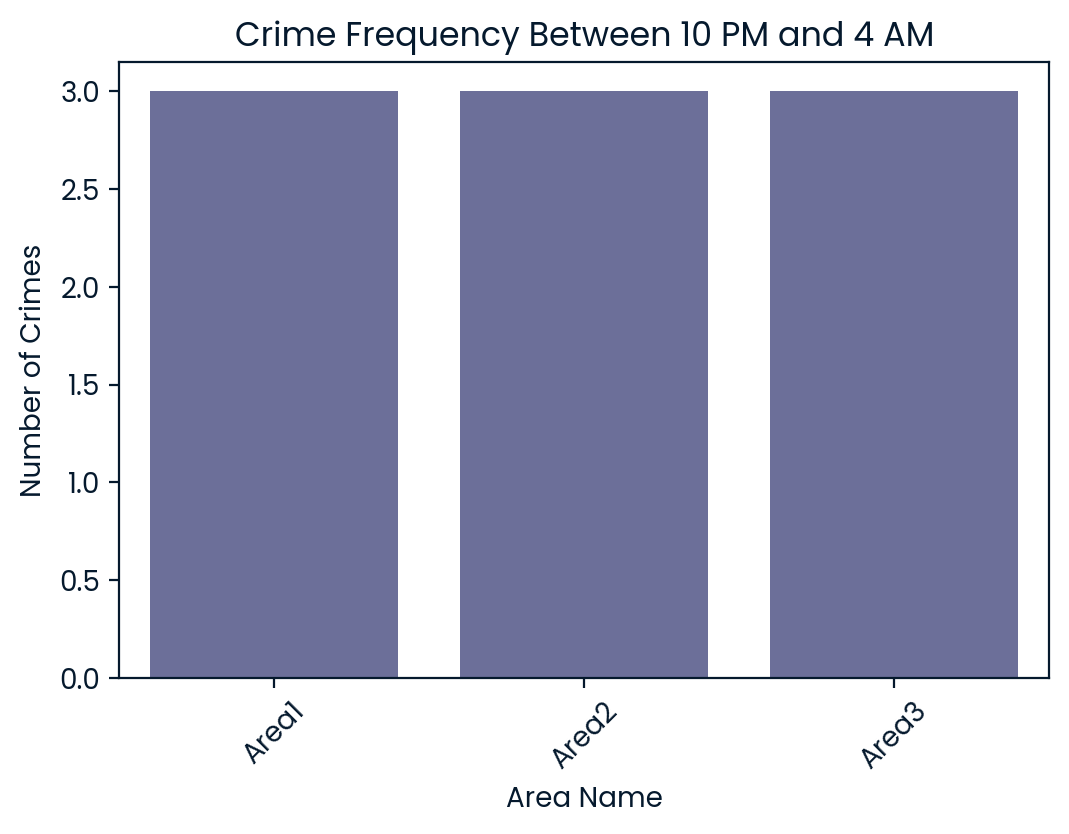

In [7]:
# Assuming df3 is a DataFrame that needs to be defined
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data to define df3
data = {
    'AREA NAME': ['Area1', 'Area2', 'Area3', 'Area1', 'Area2', 'Area3', 'Area1', 'Area2', 'Area3'],
    'TIME': ['22:00', '23:00', '00:00', '01:00', '02:00', '03:00', '22:30', '23:30', '00:30']
}
df3 = pd.DataFrame(data)

# Visualization of Crime Frequency at Night
plt.figure(figsize=(6,4))
night_crimes = df3.groupby('AREA NAME').size()
sns.barplot(x=night_crimes.index, y=night_crimes.values)
plt.title("Crime Frequency Between 10 PM and 4 AM")
plt.xlabel("Area Name")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

## Victim Age Distribution
You also created age groups for victims. We can visualize this distribution using a bar plot or pie chart to show how victims are distributed across different age groups.

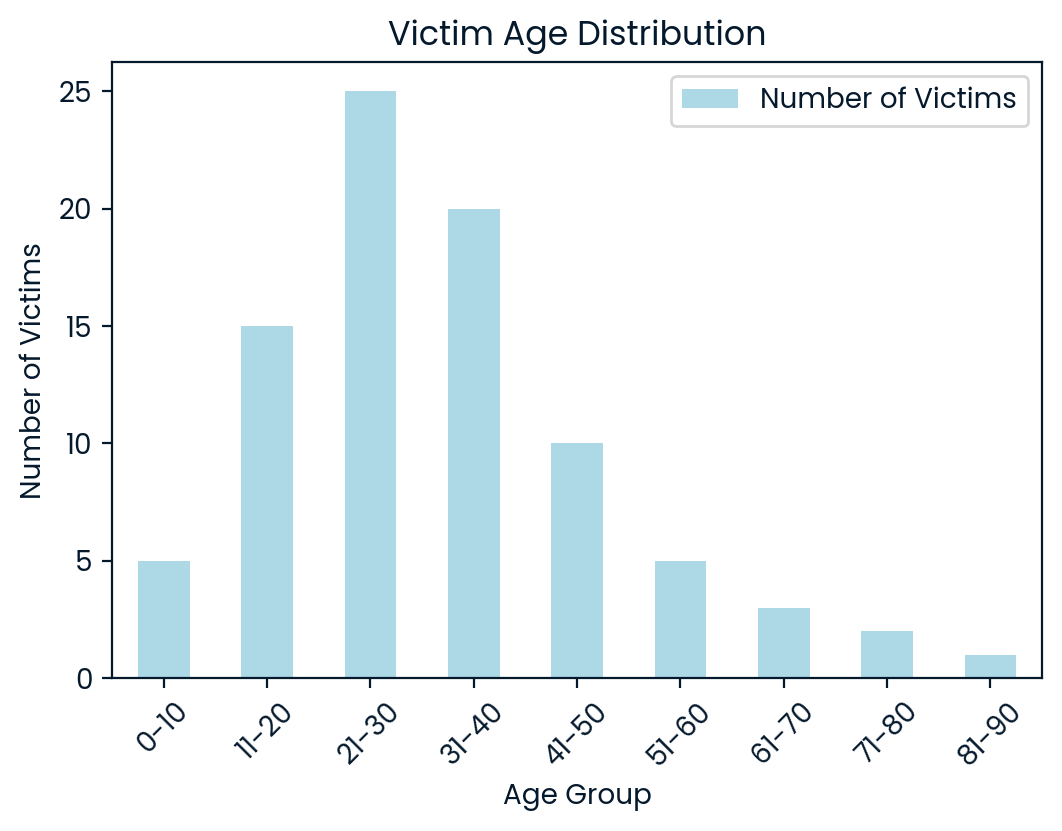

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for victim_ages
data = {'Age Group': ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'],
        'Number of Victims': [5, 15, 25, 20, 10, 5, 3, 2, 1]}
victim_ages = pd.DataFrame(data)
victim_ages.set_index('Age Group', inplace=True)

# Visualization of Victim Age Distribution
victim_ages.plot(kind='bar', figsize=(6,4), color='lightblue')
plt.title("Victim Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Victims")
plt.xticks(rotation=45)
plt.show()

## Crime Frequency by Area (Peak Crime Locations)
You identified the peak crime locations. You can visualize this with a bar plot to highlight the areas with the highest crime rates.

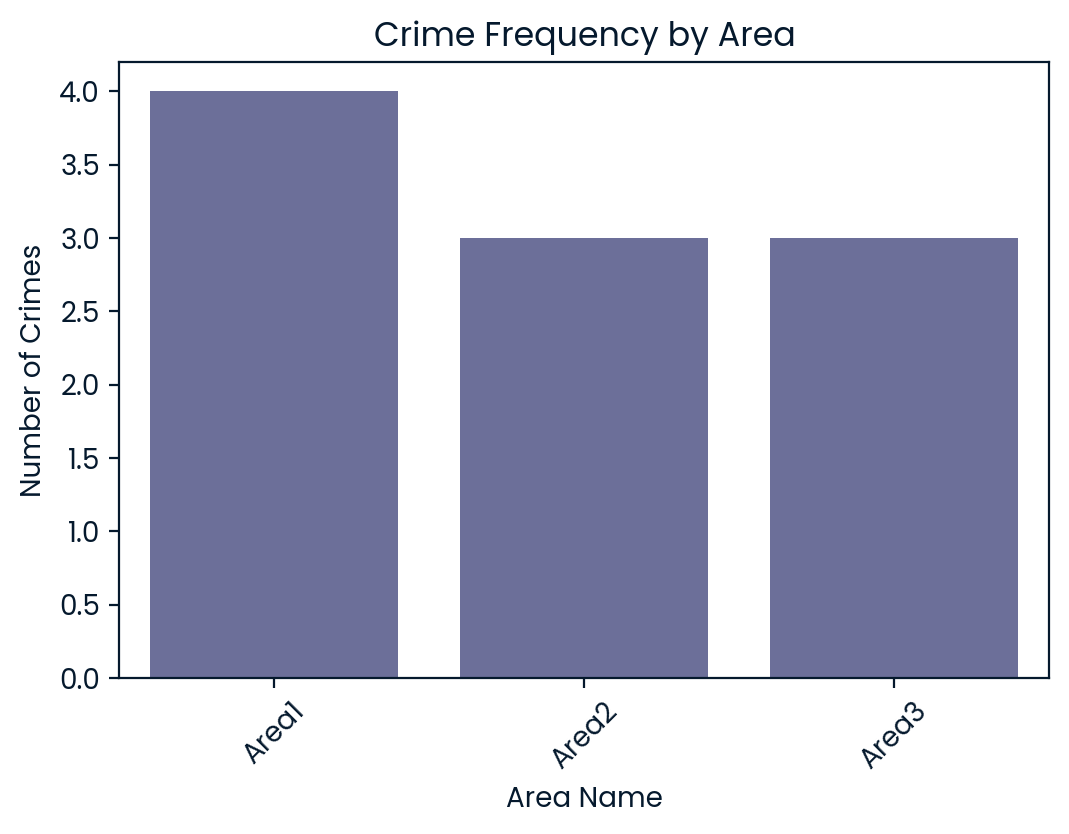

In [13]:
# Assuming df2 is the DataFrame that contains the crime data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame for demonstration purposes
data = {
    'AREA NAME': ['Area1', 'Area2', 'Area1', 'Area3', 'Area2', 'Area1', 'Area3', 'Area2', 'Area3', 'Area1'],
    'CRIME': ['Theft', 'Robbery', 'Assault', 'Theft', 'Assault', 'Robbery', 'Theft', 'Assault', 'Robbery', 'Theft']
}
df2 = pd.DataFrame(data)

# Visualization of Crime Frequency by Area
plt.figure(figsize=(6,4))
area_crimes = df2.groupby('AREA NAME').size().sort_values(ascending=False)
sns.barplot(x=area_crimes.index, y=area_crimes.values)
plt.title("Crime Frequency by Area")
plt.xlabel("Area Name")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

## Pie Chart for Victim Sex Distribution
A pie chart can show the distribution of male, female, and unknown victims.

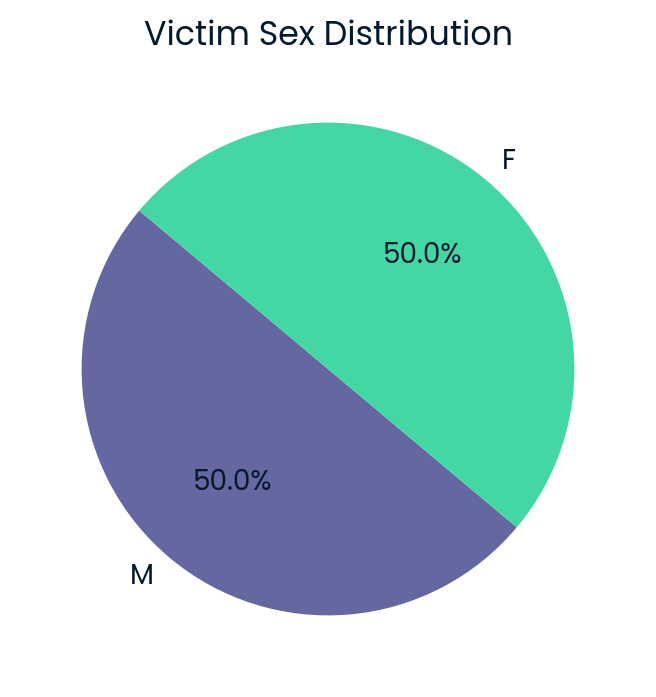

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration purposes
data = {
    'Vict Sex': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']
}
crimes = pd.DataFrame(data)

# Pie chart of Victim Sex Distribution
victim_sex_counts = crimes['Vict Sex'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(victim_sex_counts, labels=victim_sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Victim Sex Distribution")
plt.show()